In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'NGSIM/transfer1.csv'
data = pd.read_csv(path)
data.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,3355,220,"1,192",1.113430e+12,5.377,69.562,6042828.031,2133137.388,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
1,3355,223,"1,192",1.113430e+12,5.374,80.563,6042826.676,2133148.305,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
2,3355,224,"1,192",1.113430e+12,5.375,84.063,6042826.246,2133151.778,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
3,3355,239,"1,192",1.113430e+12,5.370,134.053,6042820.070,2133201.390,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
4,3355,241,"1,192",1.113430e+12,5.671,140.649,6042819.551,2133207.974,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80


In [3]:
data.sort_values(by=['Global_Time'])
data.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,3355,220,"1,192",1.113430e+12,5.377,69.562,6042828.031,2133137.388,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
1,3355,223,"1,192",1.113430e+12,5.374,80.563,6042826.676,2133148.305,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
2,3355,224,"1,192",1.113430e+12,5.375,84.063,6042826.246,2133151.778,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
3,3355,239,"1,192",1.113430e+12,5.370,134.053,6042820.070,2133201.390,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80
4,3355,241,"1,192",1.113430e+12,5.671,140.649,6042819.551,2133207.974,20.8,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,i-80


In [4]:
df_3355 = data.loc[data['Vehicle_ID'] == 3355]

In [5]:
vel_3355=[]
for i in range(len(df_3355)):
    if(i>0):
        disp = abs(df_3355.loc[df_3355.index[i], 'Global_X'] - df_3355.loc[df_3355.index[i-1], 'Global_X'])
        v = disp/0.1
        vel_3355.append(v)
        
meanv_3355 = np.mean(vel_3355)
print(meanv_3355)

9.064093567267584


In [6]:
df_3333 = data.loc[data['Vehicle_ID'] == 3333]

In [7]:
vel_3333=[]
for i in range(len(df_3333)):
    if(i>0):
        disp = abs(df_3333.loc[df_3333.index[i], 'Global_X'] - df_3333.loc[df_3333.index[i-1], 'Global_X'])
        v = disp/0.1
        vel_3333.append(v)
        
meanv_3333 = np.mean(vel_3333)
print(meanv_3333,i)

17.489754098436993 122


In [8]:
print(len(df_3355))
print(len(df_3333))
print(len(df_3355) + len(df_3333))

172
123
295


In [9]:
# Initialize

# z = 0    # position measurement
r = 16      # 2 m standard deviation (sigma), measurement uncertainty
# x = 0    # estimate
gp = 0    # 20 units standard deviation (sigma), global estimate uncertainty
q = 0.1    # process noise
gK = 0    # global Kalman gain
t = 0.1    # time slice
gx = 0

v_3355 = {'z': 0, 'x': 6042800, 'p': 400, 'K': 0, 'v': 9.064093567267584}
# v_3333 = {'z': 0, 'x': 0, 'p': 400, 'K': 0, 'v': 17.489754098436993}

In [10]:
# Measure

def measure(i,z):
    z = df_3355.loc[df_3355.index[i], 'Global_X']
    return z

In [11]:
# Update

def update(K, x , p, r, z):
    
    K = p / (p + r)  # Kalman gain
    diff = z - x
    x = x + K * (diff)  # Current estimate update
    p = p * (1 - K)  # Current estimate uncertainty update
    
    return K,x,p

In [12]:
# Predict

def predict(x,t,p,q,v):
    
    x = x - v * t
    p = p + q  # Extrapolated uncertainty
    
    return x,p

In [13]:
error_3355=[]
predictions_3355=[]
steps_3355=[]
count_3355=0
i=0
for i in range(len(df_3355)):
            
        v_3355['z'] = measure(i, v_3355['z'])
        diff = abs(v_3355['z'] - v_3355['x'])
        predictions_3355.append(v_3355['x'])
        error_3355.append(diff)
        
        v_3355['K'], v_3355['x'], v_3355['p'] = update(v_3355['K'], v_3355['x'], v_3355['p'], r, v_3355['z'])
        v_3355['x'], v_3355['p'] = predict(v_3355['x'], t, v_3355['p'], q, v_3355['v'])
        
        if(i==40):
            gK = v_3355['K']
            gp = v_3355['p']
            gx = v_3355['x']
            
        steps_3355.append(count_3355)
        count_3355=count_3355+0.1

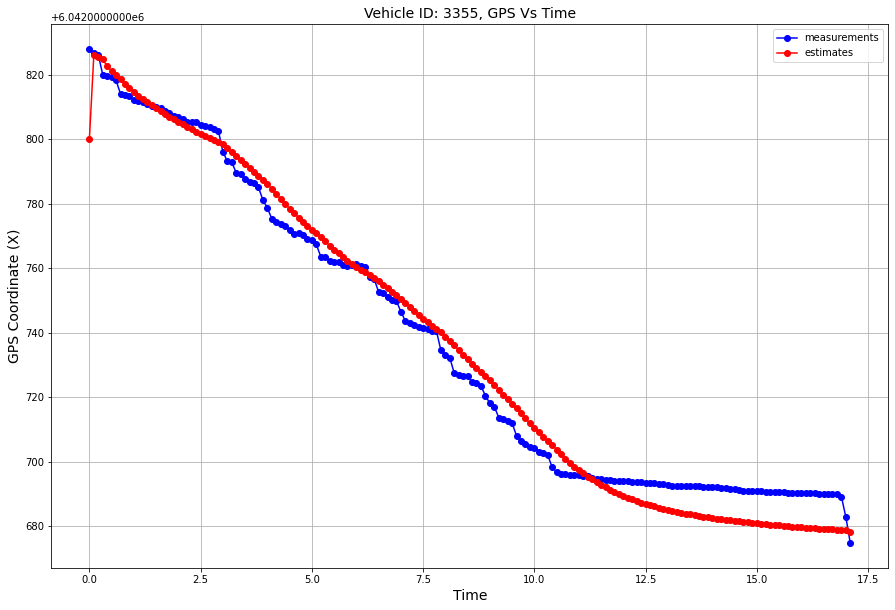

In [14]:
plt.figure(figsize=(15, 10))
plt.plot(steps_3355, df_3355['Global_X'], color='blue', marker='o')
plt.plot(steps_3355, predictions_3355, color='red', marker='o')
plt.legend(['measurements', 'estimates'], loc='upper right')
plt.title('Vehicle ID: 3355, GPS Vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('GPS Coordinate (X)', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
# Initialize

v_3333 = {'z': 0, 'x': 0, 'p': 400, 'K': 0, 'v': 17.489754098436993}
v_3333['K'] = gK
v_3333['p'] = gp + 100
v_3333['x'] = gx + 80

In [16]:
# Measure

def measure(i,z):
    z = df_3333.loc[df_3333.index[i], 'Global_X']
    return z

In [17]:
error_3333=[]
predictions_3333=[]
steps_3333=[]
count_3333=0
i=0
for i in range(len(df_3333)):

        v_3333['z'] = measure(i, v_3333['z'])
        diff = abs(v_3333['z'] - v_3333['x'])
        predictions_3333.append(v_3333['x'])
        error_3333.append(diff)
        
        v_3333['K'], v_3333['x'], v_3333['p'] = update(gK, v_3333['x'], gp, r, v_3333['z'])
        v_3333['x'], v_3333['p'] = predict(v_3333['x'], t, v_3333['p'], q, v_3333['v'])
        
        gK = v_3333['K']
        gp = v_3333['p']
        steps_3333.append(count_3333)
        count_3333=count_3333+0.1

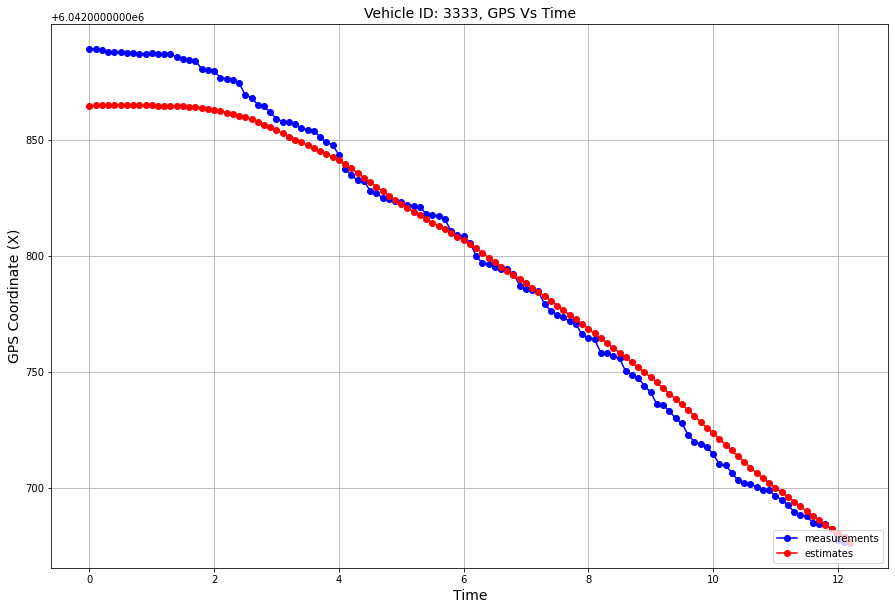

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(steps_3333, df_3333['Global_X'], color='blue', marker='o')
plt.plot(steps_3333, predictions_3333, color='red', marker='o')
plt.legend(['measurements', 'estimates'], loc='lower right')
plt.title('Vehicle ID: 3333, GPS Vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('GPS Coordinate (X)', fontsize=14)
plt.grid(True)
plt.show()

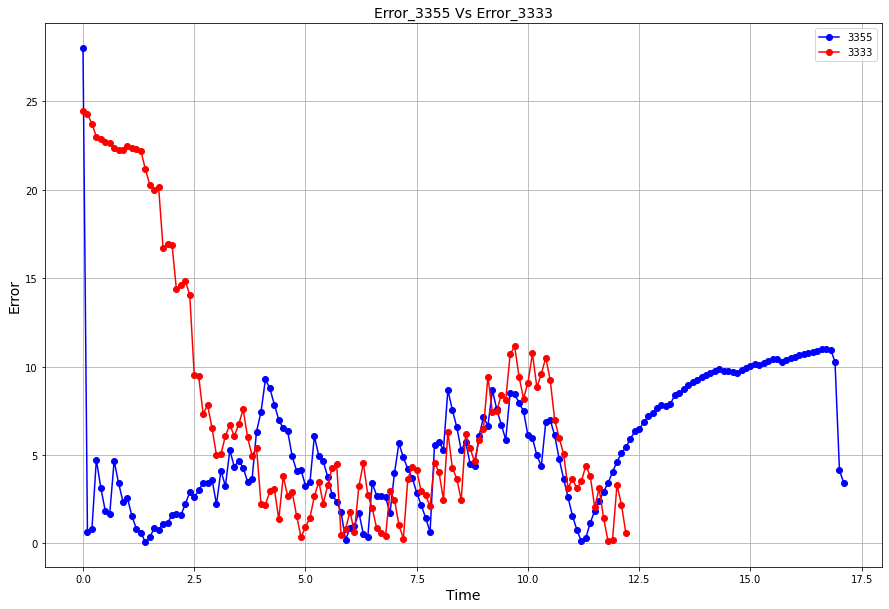

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(steps_3355, error_3355, color='blue', marker='o')
plt.plot(steps_3333, error_3333, color='red', marker='o')
plt.legend(['3355', '3333'], loc='upper right')
plt.title('Error_3355 Vs Error_3333', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.grid(True)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x23009498940>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23009498880>,
 'cmins': <matplotlib.collections.LineCollection at 0x23009498fd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x230094aa3d0>}

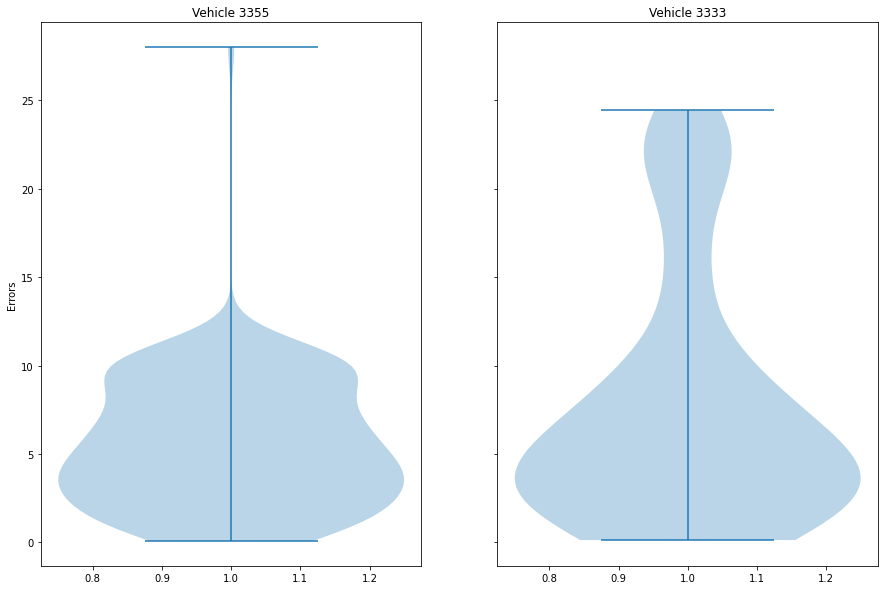

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, 
                               ncols = 2,
                               figsize =(15, 10),
                               sharey = True)
  
ax1.set_title('Vehicle 3355')
ax1.set_ylabel('Errors')
ax1.violinplot(error_3355)

ax2.set_title('Vehicle 3333')
ax2.violinplot(error_3333)

In [22]:
path = 'NGSIM/transfer2.csv'
data = pd.read_csv(path)
data.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,2862,288,585,1.113440e+12,30.626,68.067,6042853.272,2133139.008,14.3,6.4,...,NaN,NaN,NaN,NaN,NaN,383,0,66.27,2.77,i-80
1,2863,288,589,1.113440e+12,17.871,86.096,6042838.398,2133155.329,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,402,0,83.50,4.43,i-80
2,2863,292,589,1.113440e+12,17.871,93.887,6042837.436,2133163.091,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,402,0,85.41,4.36,i-80
3,2862,295,585,1.113440e+12,30.618,84.729,6042851.220,2133155.509,14.3,6.4,...,NaN,NaN,NaN,NaN,NaN,383,0,72.67,2.76,i-80
4,2863,303,589,1.113440e+12,17.872,116.21,6042834.689,2133185.223,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,402,419,91.57,4.61,i-80


In [23]:
df_2861 = data.loc[data['Vehicle_ID'] == 2861]
df_2862 = data.loc[data['Vehicle_ID'] == 2862]
df_2863 = data.loc[data['Vehicle_ID'] == 2863]

In [24]:
vel_2861=[]
for i in range(len(df_2861)):
    if(i>0):
        disp = abs(df_2861.loc[df_2861.index[i], 'Global_X'] - df_2861.loc[df_2861.index[i-1], 'Global_X'])
        v = disp/0.1
        vel_2861.append(v)
        
meanv_2861 = np.mean(vel_2861)
print(meanv_2861)

27.618860759524793


In [25]:
vel_2862=[]
for i in range(len(df_2862)):
    if(i>0):
        disp = abs(df_2862.loc[df_2862.index[i], 'Global_X'] - df_2862.loc[df_2862.index[i-1], 'Global_X'])
        v = disp/0.1
        vel_2862.append(v)
        
meanv_2862 = np.mean(vel_2862)
print(meanv_2862)

22.489892473163945


In [26]:
vel_2863=[]
for i in range(len(df_2863)):
    if(i>0):
        disp = abs(df_2863.loc[df_2863.index[i], 'Global_X'] - df_2863.loc[df_2863.index[i-1], 'Global_X'])
        v = disp/0.1
        vel_2863.append(v)
        
meanv_2863 = np.mean(vel_2863)
print(meanv_2863)

24.972068965435028


In [27]:
print(len(df_2861))
print(len(df_2862))
print(len(df_2863))

80
94
88


In [28]:
# Initialize

v_2861 = {'z': 0, 'x': 6042976.414, 'p': 1000, 'K': 0, 'v': 27.618860759524793}
v_2861['K'] = gK
v_2861['p'] = gp

v_2862 = {'z': 0, 'x': 6042953.272, 'p': 1000, 'K': 0, 'v': 22.489892473163945}
v_2862['K'] = gK
v_2862['p'] = gp

v_2863 = {'z': 0, 'x': 6042938.398, 'p': 1000, 'K': 0, 'v': 24.972068965435028}
v_2863['K'] = gK
v_2863['p'] = gp

In [29]:
# Measure

def measure(i,z):
    z = df_2861.loc[df_2861.index[i], 'Global_X']
    return z

In [30]:
error_2861=[]
predictions_2861=[]
steps_2861=[]
count_2861=0
i=0
for i in range(len(df_2861)):

        v_2861['z'] = measure(i, v_2861['z'])
        diff = abs(v_2861['z'] - v_2861['x'])
        predictions_2861.append(v_2861['x'])
        error_2861.append(diff)
        
        v_2861['K'], v_2861['x'], v_2861['p'] = update(v_2861['K'], v_2861['x'], v_2861['v'], r, v_2861['z'])
        v_2861['x'], v_2861['p'] = predict(v_2861['x'], t, v_2861['p'], q, v_2861['v'])
        
        steps_2861.append(count_2861)
        count_2861=count_2861+0.1

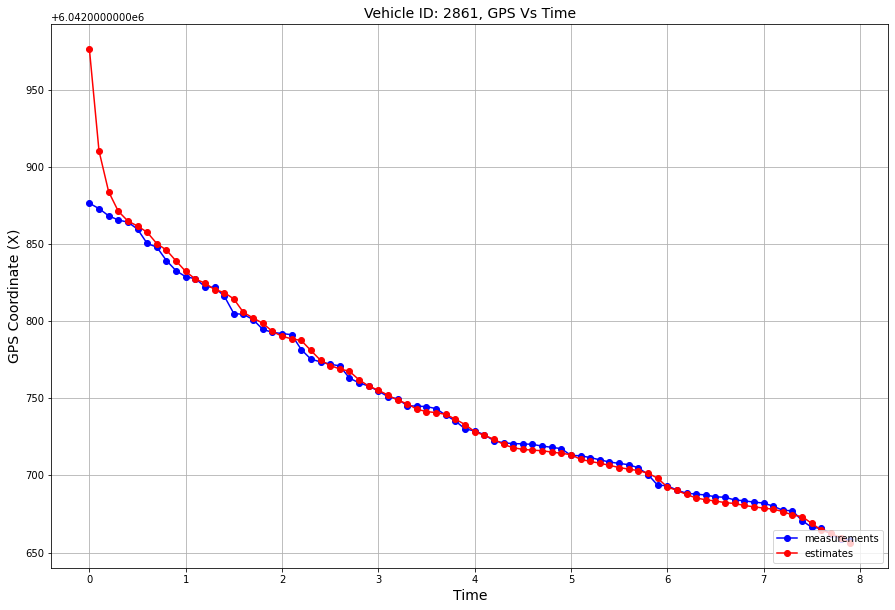

In [31]:
plt.figure(figsize=(15, 10))
plt.plot(steps_2861, df_2861['Global_X'], color='blue', marker='o')
plt.plot(steps_2861, predictions_2861, color='red', marker='o')
plt.legend(['measurements', 'estimates'], loc='lower right')
plt.title('Vehicle ID: 2861, GPS Vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('GPS Coordinate (X)', fontsize=14)
plt.grid(True)
plt.show()

In [32]:
# Measure

def measure(i,z):
    z = df_2862.loc[df_2862.index[i], 'Global_X']
    return z

In [33]:
error_2862=[]
predictions_2862=[]
steps_2862=[]
count_2862=0
i=0
for i in range(len(df_2862)):

        v_2862['z'] = measure(i, v_2862['z'])
        diff = abs(v_2862['z'] - v_2862['x'])
        predictions_2862.append(v_2862['x'])
        error_2862.append(diff)
        
        v_2862['K'], v_2862['x'], v_2862['p'] = update(v_2862['K'], v_2862['x'], v_2862['v'], r, v_2862['z'])
        v_2862['x'], v_2862['p'] = predict(v_2862['x'], t, v_2862['p'], q, v_2862['v'])
        
        steps_2862.append(count_2862)
        count_2862=count_2862+0.1

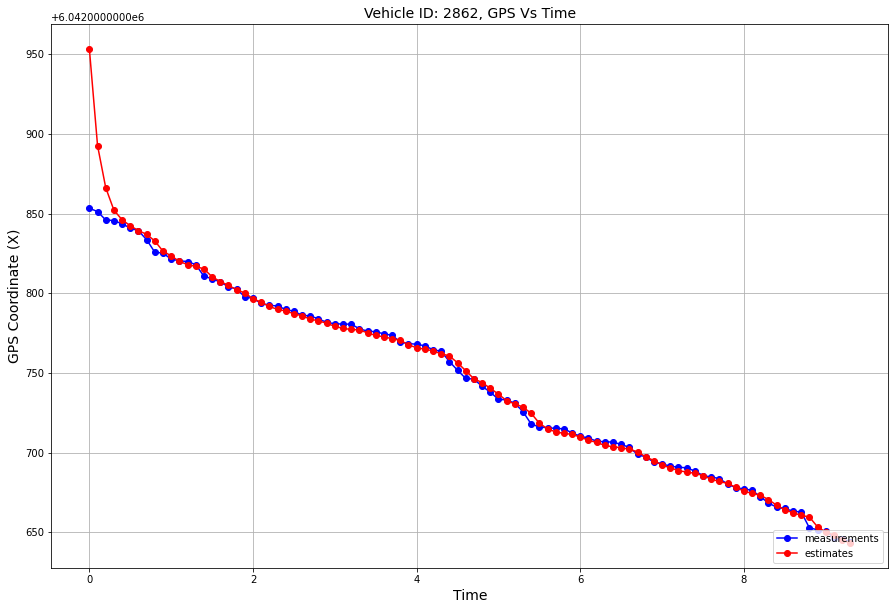

In [35]:
plt.figure(figsize=(15, 10))
plt.plot(steps_2862, df_2862['Global_X'], color='blue', marker='o')
plt.plot(steps_2862, predictions_2862, color='red', marker='o')
plt.legend(['measurements', 'estimates'], loc='lower right')
plt.title('Vehicle ID: 2862, GPS Vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('GPS Coordinate (X)', fontsize=14)
plt.grid(True)
plt.show()

In [39]:
# Measure

def measure(i,z):
    z = df_2863.loc[df_2863.index[i], 'Global_X']
    return z

In [40]:
error_2863=[]
predictions_2863=[]
steps_2863=[]
count_2863=0
i=0
for i in range(len(df_2863)):

        v_2863['z'] = measure(i, v_2863['z'])
        diff = abs(v_2863['z'] - v_2863['x'])
        predictions_2863.append(v_2863['x'])
        error_2863.append(diff)
        
        v_2863['K'], v_2863['x'], v_2863['p'] = update(v_2863['K'], v_2863['x'], v_2863['v'], r, v_2863['z'])
        v_2863['x'], v_2863['p'] = predict(v_2863['x'], t, v_2863['p'], q, v_2863['v'])
        
        steps_2863.append(count_2863)
        count_2863=count_2863+0.1

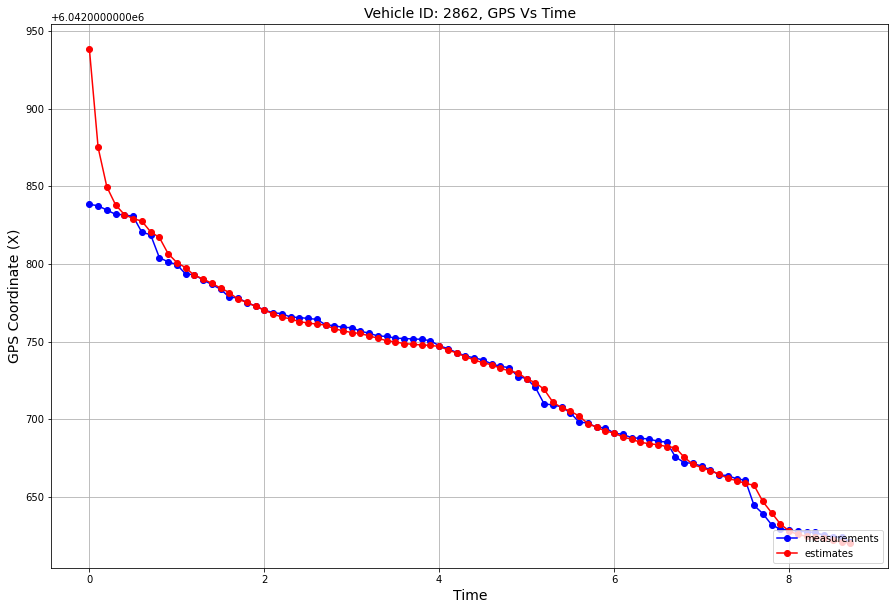

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(steps_2863, df_2863['Global_X'], color='blue', marker='o')
plt.plot(steps_2863, predictions_2863, color='red', marker='o')
plt.legend(['measurements', 'estimates'], loc='lower right')
plt.title('Vehicle ID: 2862, GPS Vs Time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('GPS Coordinate (X)', fontsize=14)
plt.grid(True)
plt.show()

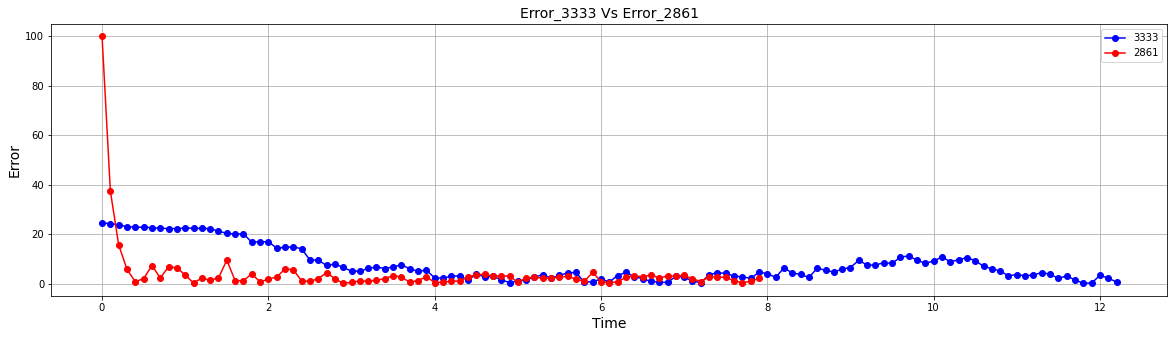

In [47]:
plt.figure(figsize=(20, 5))
plt.plot(steps_3333, error_3333, color='blue', marker='o')
plt.plot(steps_2861, error_2861, color='red', marker='o')
plt.legend(['3333', '2861'], loc='upper right')
plt.title('Error_3333 Vs Error_2861', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.grid(True)
plt.show()

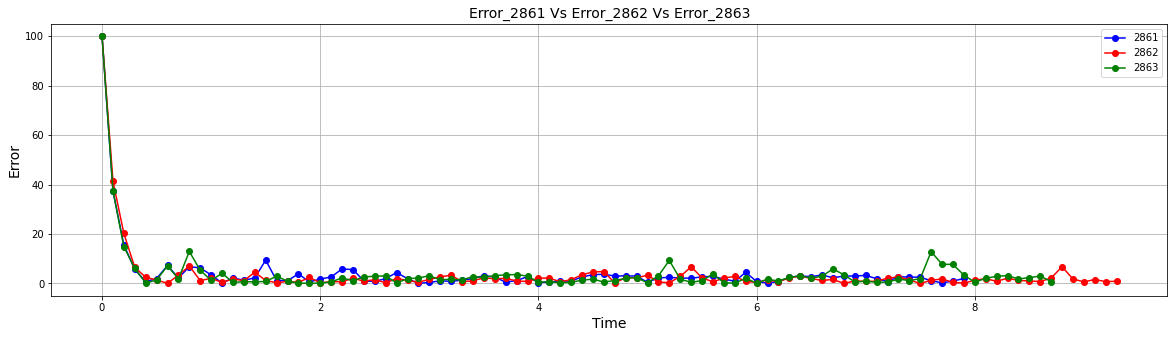

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(steps_2861, error_2861, color='blue', marker='o')
plt.plot(steps_2862, error_2862, color='red', marker='o')
plt.plot(steps_2863, error_2863, color='green', marker='o')
plt.legend(['2861', '2862', '2863'], loc='upper right')
plt.title('Error_2861 Vs Error_2862 Vs Error_2863', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.grid(True)
plt.show()